# Text Mining sobre el texto preprocesado

## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
import re


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

## Leer datos

In [2]:
df = pd.read_csv('../datasets/df_final.csv', sep=';')
# df = pd.read_excel('dataset_2023.xlsx')
# df["Descripcion"] = df["Descripcion"].fillna("")
df.shape

(46367, 59)

In [3]:
df['texto_limpio'].head()

0          AFR PLAN OBRAS EQUIPAMIENTOS SERVICIOS 2022
1                       312 FONDO EROGACIÓN PLAN OBRAS
2    AFR PLAN OBRAS EQUIPAMIENTO SERVICIOS 2022 RUR...
3    DCTO 119 AFR PGO HAB ASIG FLIAR ENE CTA 200982014
4    DCTO 120 AFR PGO HAB ASIG FLIAR ENE CTA 200981813
Name: texto_limpio, dtype: object

In [5]:
df['texto_limpio'].sample(5)

34537         RES SLI SUELDO MES SESOP CTA 360000001136472
29455                    988 9420707267 2102 TECEIRA MONOT
43961              RES 473 CTA 1123656 SUBS FASSORA SENAYF
4240            ANR SAT PAGO TEM NOVIEMBRE 2022 CTA 514510
16547    RES 2161 FUND SANDRO LIQ 10140 CTA 36000941978...
Name: texto_limpio, dtype: object

In [6]:
df['texto_limpio'].tail()

46362    LEY 2100 CTA 360000200973511 LEY 7991 CAP FED
46363        LEY 2099 CTA 360000200973511 LEY 7991 DGR
46364    3887 DGC LEY 7991 NOV 2023 CTA 36000020097385
46365          RES 359 LEY 7991 HABERES DIC CTA 789009
46366             LEY 7991 HAB DIC 173 360000200983222
Name: texto_limpio, dtype: object

In [7]:
df.isna().sum()

Ncuenta                    0
NEntidad                   0
Cod                        0
FteFin                     0
Cuit                       0
CodBco                     0
target                     0
texto_limpio               1
description_size           0
description_words_count    0
text_size                  0
text_words_count           0
TipoComp_AF                0
TipoComp_FF                0
TipoComp_GA                0
TipoComp_GC                0
TipoComp_GE                0
TipoPres_E                 0
TipoPres_P                 0
TipoReg_AMP                0
TipoReg_ANT                0
TipoReg_APE                0
TipoReg_CYO                0
TipoReg_ORD                0
TipoReg_PAG                0
TipoReg_RPO                0
ClaseReg_                  0
ClaseReg_DPU               0
ClaseReg_OGA               0
ClaseReg_REM               0
TipoCta_P                  0
TipoCta_R                  0
pesos_0                    0
pesos_1                    0
pesos_2       

In [8]:
df["texto_limpio"] = df["texto_limpio"].fillna("")

## Wordcloud

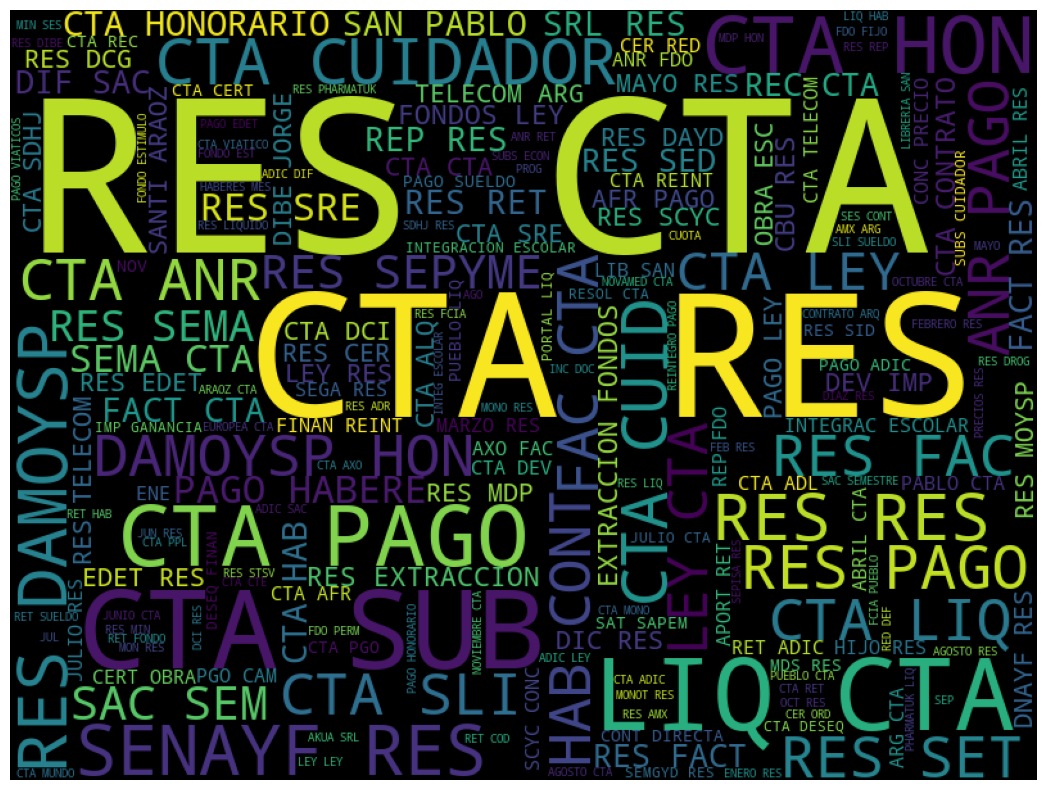

In [9]:
wc = WordCloud(' '.join(df['texto_limpio']))
def cloud(data, backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['texto_limpio']))

## Longitud de las descripciones

In [12]:
df['text_size_limpia'] = df['texto_limpio'].str.len()
df['text_size_limpia'].describe()

count    46367.000000
mean        40.765588
std          8.494294
min          0.000000
25%         35.000000
50%         42.000000
75%         47.000000
max         64.000000
Name: text_size_limpia, dtype: float64

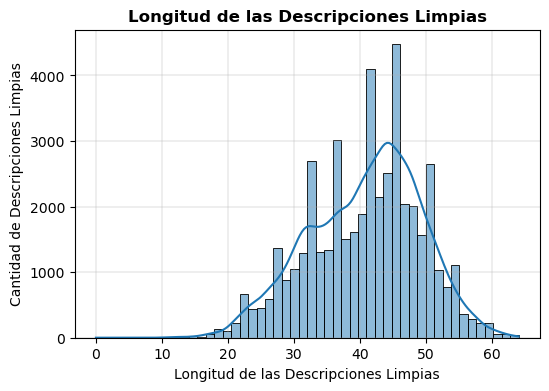

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['text_size_limpia'], kde=True, bins=50)
plt.title('Longitud de las Descripciones Limpias', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('Cantidad de Descripciones Limpias')
plt.xlabel('Longitud de las Descripciones Limpias')
plt.grid(linewidth=0.3)
plt.show()

In [14]:
df['text_words_count'] = df['texto_limpio'].apply(lambda x: len(x.split()))  
df['text_words_count'].describe()

count    46367.000000
mean         6.683525
std          1.438108
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: text_words_count, dtype: float64

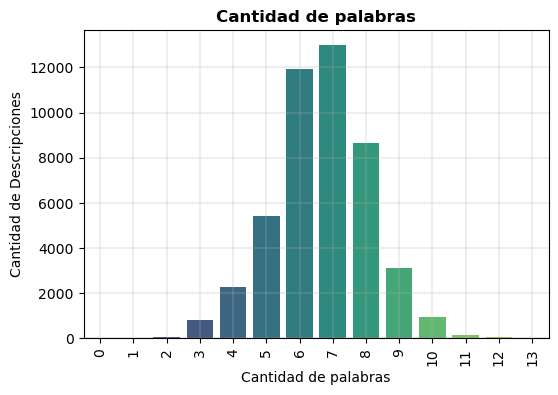

In [15]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['text_words_count'].value_counts().index, y=df['text_words_count'].value_counts().values, palette='viridis')
plt.title('Cantidad de palabras', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Cantidad de palabras')
plt.grid(linewidth=0.3)
plt.xticks(rotation=90)  # Rotar las etiquetas si hay muchas categorías
plt.show()

## Frecuencia de palabras

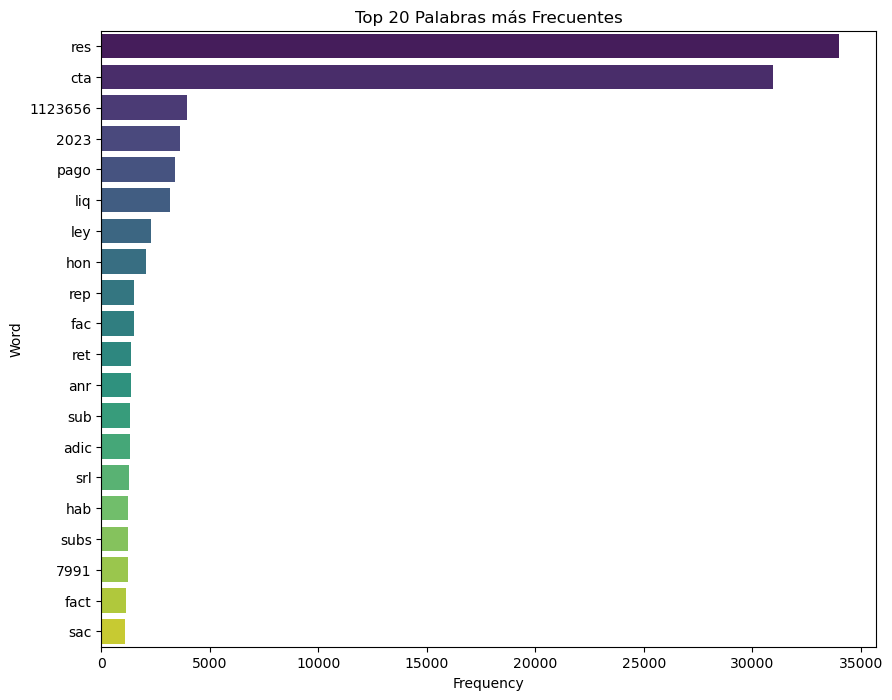

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Obtener todas las descripciones como una lista de palabras
all_descriptions = ' '.join(df['texto_limpio'].dropna())  # Concatenar todas las descripciones

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words('spanish')) 
word_tokens = word_tokenize(all_descriptions.lower())  # Tokenización y convertir a minúsculas
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]  # Filtrar stopwords y no palabras alfa
freq_of_words = pd.Series(filtered_words).value_counts()



# Crear DataFrame con las palabras y sus frecuencias
freq_of_words = pd.Series(filtered_words).value_counts().reset_index()
freq_of_words.columns = ['Word', 'Frequency']

# Seleccionar las 20 palabras más frecuentes
top_words = freq_of_words.head(20)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras horizontal
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Palabras más Frecuentes')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Frecuencia de palabras según target

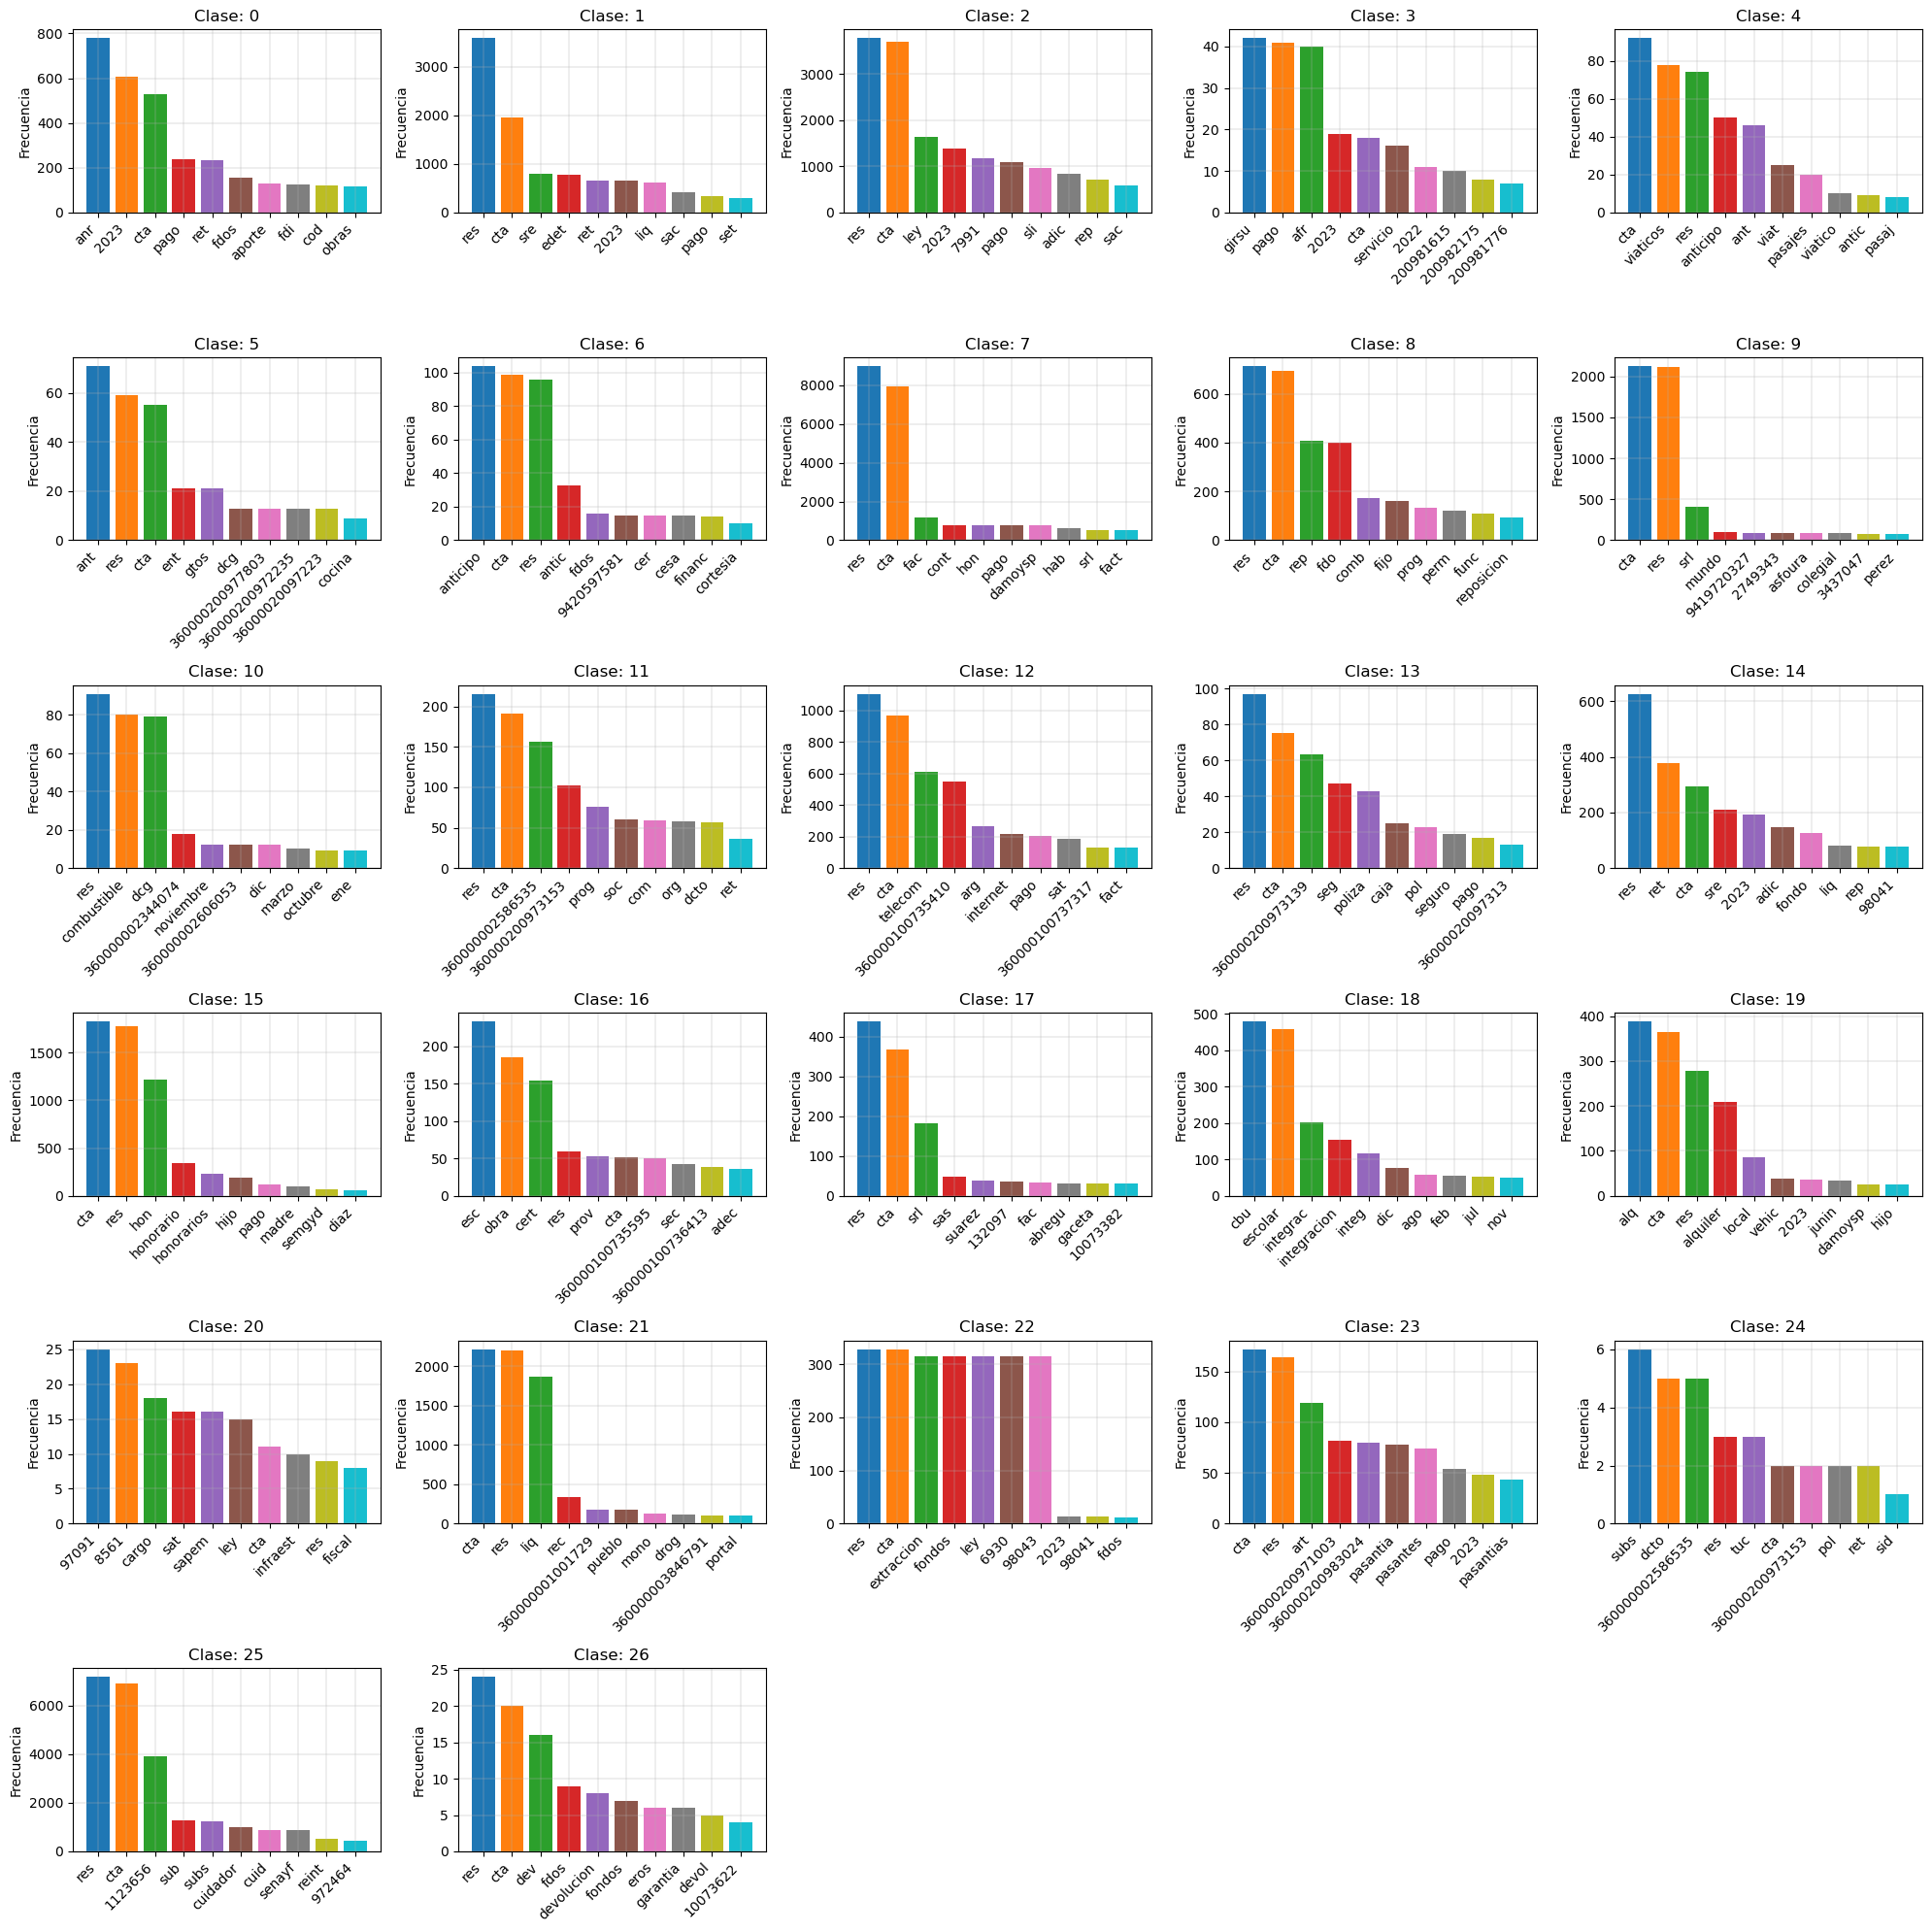

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Configurar el layout de la grilla, ajustando a solo 27 subplots (5 filas x 5 columnas)
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
axes = axes.flatten()  # Convertir la grilla en una lista
colors = sns.color_palette("tab10")

# Iterar sobre cada clase en "Class"
for i, class_value in enumerate(df['target'].unique()):
    if i >= 27:  # Evitar subplots adicionales si hay más de 27 clases
        break
    
    # Combinar el texto para la clase actual
    combined_text = ' '.join(df[df['target'] == class_value]['texto_limpio'].astype(str))
    
    # Tokenizar el texto en palabras
    tokens = word_tokenize(combined_text.lower())  # Convertir a minúsculas
    
    # Crear la distribución de frecuencias
    fdist = FreqDist(tokens)
    
    # Tomar las 10 palabras más comunes
    most_common_words = fdist.most_common(10)
    
    # Separar las palabras y sus frecuencias para graficar
    words, counts = zip(*most_common_words)
    
    # Graficar en la posición correspondiente de la grilla
    ax = axes[i]
    ax.bar(words, counts, color=colors)
    ax.set_title(f"Clase: {class_value}", fontsize=12)
    ax.set_xticklabels(words, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Frecuencia')
    ax.grid(linewidth=0.3)

# Eliminar los subplots vacíos (28, 29 y 30)
for j in range(27, 30):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


## Word2Vect: Distacia entre palabras más frecuentes

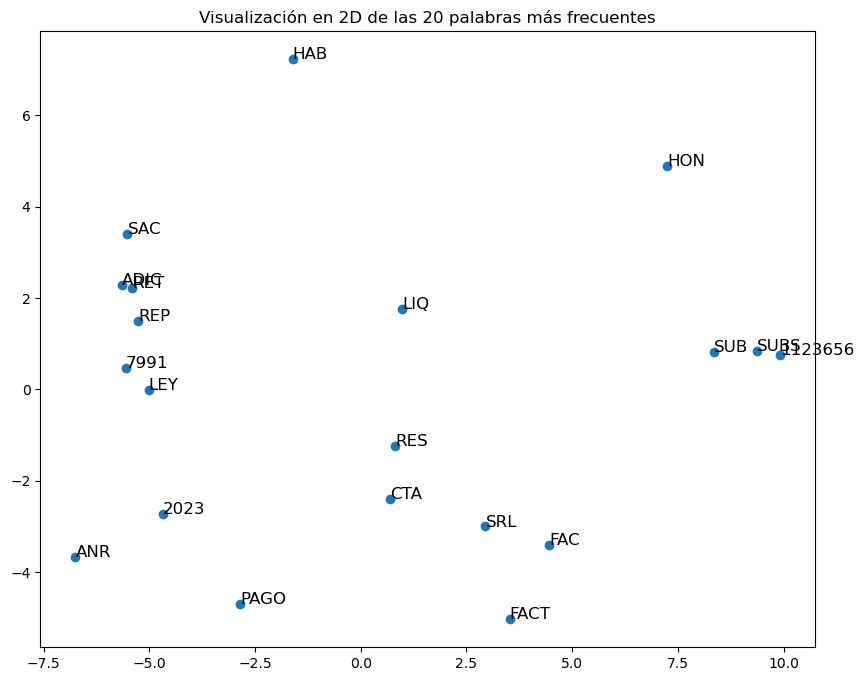

In [20]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar las oraciones como listas de palabras
sentences = [row.split() for row in df['texto_limpio']]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Obtener los vectores de las palabras
words = list(model.wv.index_to_key)

# Seleccionar las 20 palabras más frecuentes
top_words = words[:20]
X = model.wv[top_words]

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Anotar solo las palabras seleccionadas en el gráfico
for i, word in enumerate(top_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title('Visualización en 2D de las 20 palabras más frecuentes')
plt.show()


## Word2Vect: Distacia entre palabras más frecuentes por clase

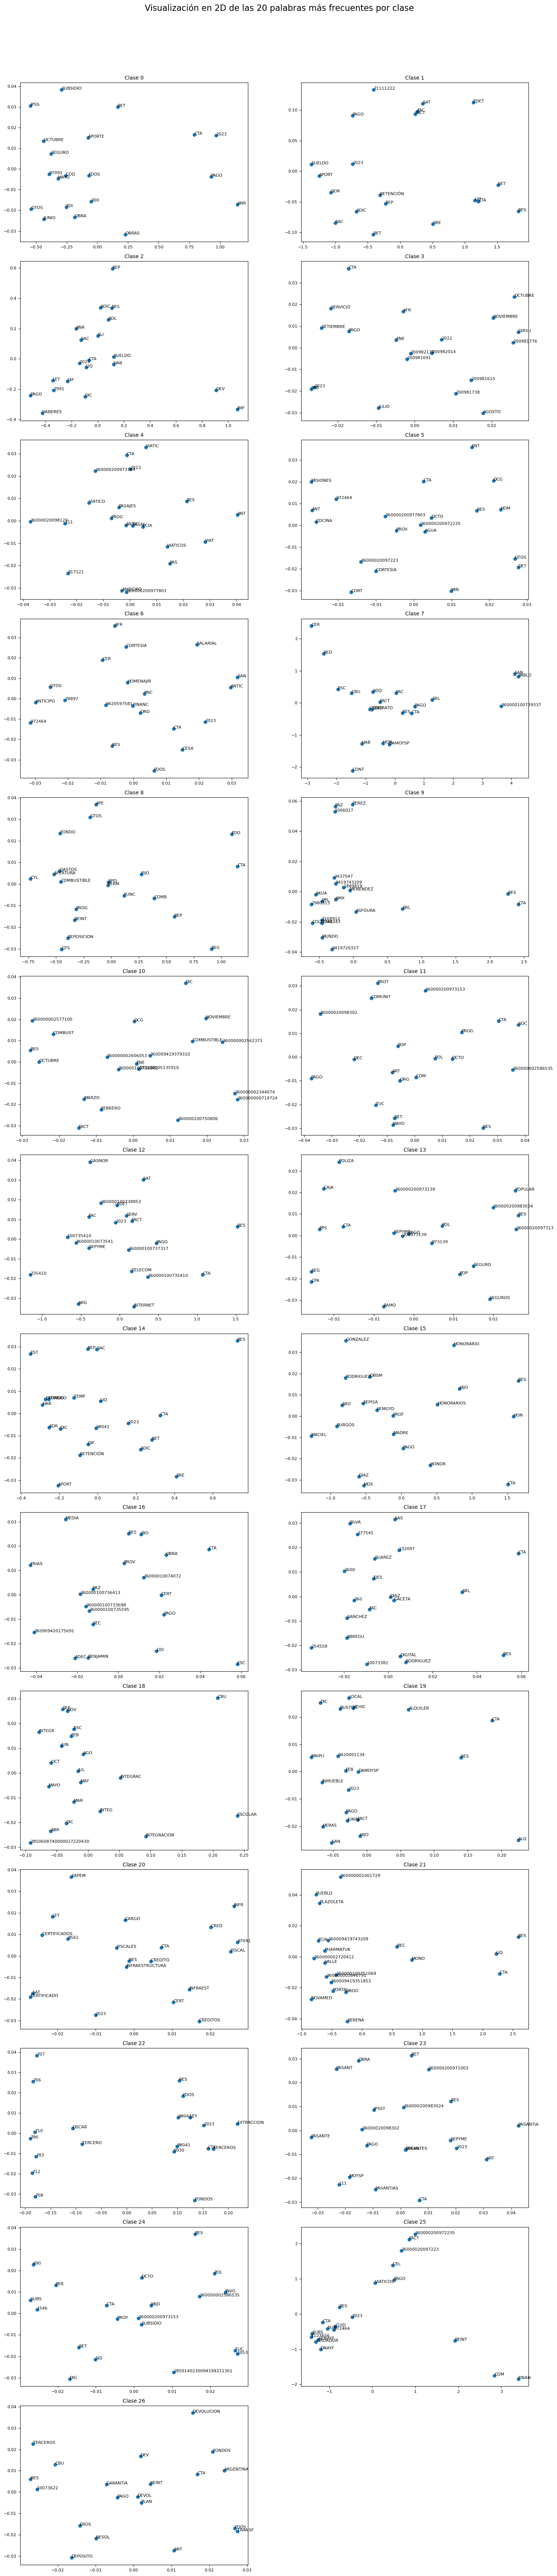

In [21]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

def plot_word2vec_pca(ax, df, class_value):
    # Filtrar el DataFrame para la clase específica
    df_class = df[df['target'] == class_value]
    
    # Preparar las oraciones como listas de palabras
    sentences = [row.split() for row in df_class['texto_limpio']]
    
    # Entrenar el modelo Word2Vec
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    # Obtener los vectores de las palabras
    words = list(model.wv.index_to_key)
    
    # Seleccionar las 20 palabras más frecuentes
    top_words = words[:20]
    X = model.wv[top_words]
    
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # Graficar
    ax.scatter(result[:, 0], result[:, 1])
    
    # Anotar solo las palabras seleccionadas en el gráfico
    for i, word in enumerate(top_words):
        ax.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8)
    
    ax.set_title(f'Clase {class_value}', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Obtener todas las clases únicas
classes = df['target'].unique()

# Calcular el número de filas necesarias
n_rows = math.ceil(len(classes) / 2)

# Crear la figura y los subplots
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
fig.suptitle('Visualización en 2D de las 20 palabras más frecuentes por clase', fontsize=16)

# Aplanar el array de ejes si solo hay una fila
if n_rows == 1:
    axs = axs.reshape(1, -1)

# Crear un gráfico para cada clase
for i, class_value in enumerate(classes):
    row = i // 2
    col = i % 2
    plot_word2vec_pca(axs[row, col], df, class_value)

# Ocultar subplots vacíos si el número de clases es impar
if len(classes) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Ajustar para el título principal
plt.show()

## NER

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
  return ents

In [23]:
df["NER"] = df["texto_limpio"].apply(get_entities)

In [24]:
df[['texto_limpio', 'NER']].sample(20)

texto_limpio  \
30056                RES 746 CTA 9419741612 HON SANTUCHO   
5827               CTA 362809420586992 179 MARCIAL MONOT   
34731     ADICIONAL CONECTIVIDAD NAC ENE 360000200983192   
7823                RES CTA 360000942010061 ART LIBRERIO   
35469       SLI RES CTA 360000003263754 PAGO SUELDO 2023   
36596                      RES 775 CTA 1123656 SUB BRITO   
4974                               RES CTA 98390 RET HAB   
9582                       RES 169 RET SUELDO MARZO 2023   
32222           RES SEP CUSTODIA ARCH CTA 36000010074462   
25320  RES 689 DAMOYSP EXPEN MAIPU 2712 CTA 360000100...   
37778                          RES 681 CTA 1123656 AVILA   
9833                      ANR PAGO HABERE MARZO 20097360   
28285                        OCA LOG CTA 362809420115655   
40786               RES 6066 CTA 1123656 SUB STALHAMMMAR   
33323          RES 36000020097302 ADIC BONO ENE HACIENDA   
36806               RES 2984 CTA 1123656 CUIDADOR ALFARO   
19776                  DCTO 2342 MOV PIE 360000002586535   
33989     212 CTA 360000200978936 PAGO ADIC DIF SAC 2022   
18387                        2394 FERREYRA 3600094198373   
35993                  RES 2023 CTA 1123656 CUID ACEBEDO   

                                           NER  
30056                                    [RES]  
5827                                        []  
34731         [ADICIONAL CONECTIVIDAD NAC ENE]  
7823                                        []  
35469         [SLI, CTA 360000003263754, 2023]  
36596             [RES, CTA 1123656 SUB BRITO]  
4974                     [CTA 98390, RET, HAB]  
9582                               [RET, 2023]  
32222  [RES, CUSTODIA ARCH CTA 36000010074462]  
25320                     [RES, DAMOYSP EXPEN]  
37778                                    [RES]  
9833                           [ANR, 20097360]  
28285                                       []  
40786                               [RES 6066]  
33323  [RES 36000020097302, BONO ENE HACIENDA]  
36806                      [RES 2984, 1123656]  
19776                               [2342 MOV]  
33989                                    [212]  
18387          [2394, FERREYRA, 3600094198373]  
35993                                       []

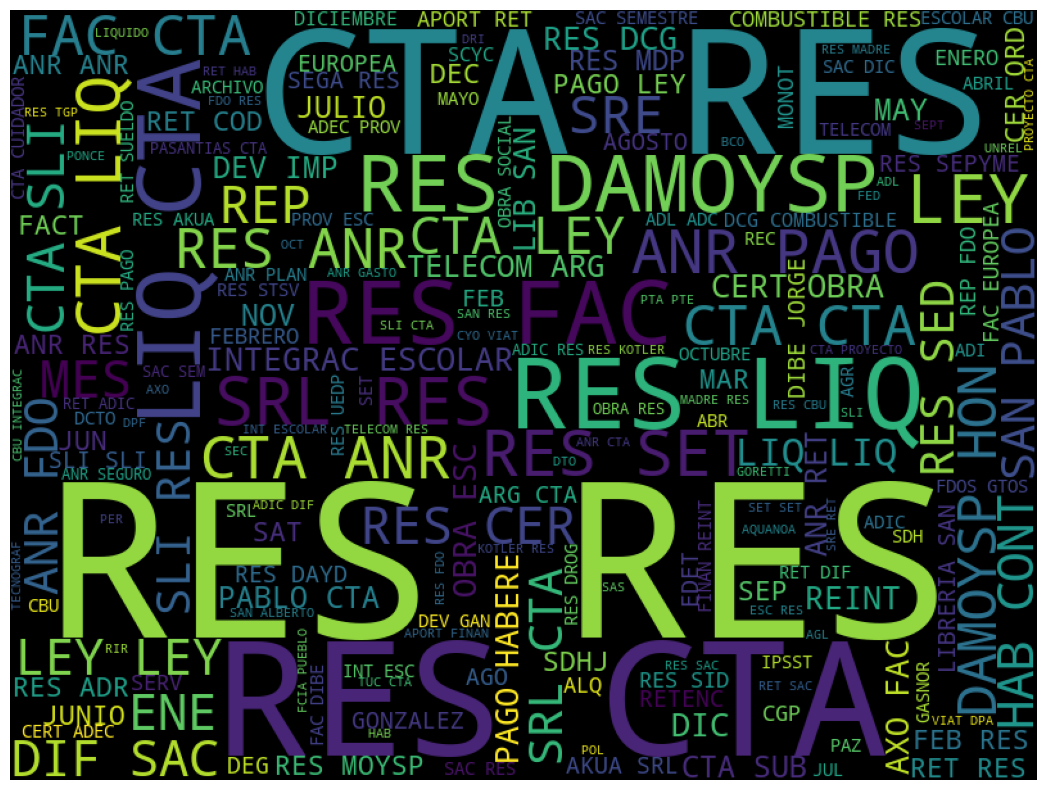

In [25]:
# Asegurarse de que todos los valores de la columna 'NER' sean tratados como cadenas
df_exploded = df.explode("NER")
df_exploded['NER_explotado'] = df_exploded['NER'].apply(lambda x: str(x or ""))

# Filtrar y contar las ocurrencias no numéricas en la columna 'NER'
df_ner_exploded = (
    df_exploded[df_exploded.NER_explotado.apply(lambda x: not x.isnumeric())]
    .groupby("NER_explotado")
    .size()
    .reset_index(name='cantidad')
    .sort_values(by="cantidad", ascending=False)
    .head(20)
)

# Filtrar los valores que no sean 'nan'
df_exploded = df_exploded[df_exploded['NER_explotado'] != 'nan']

# Generar la nube de palabras (cloud) usando la columna correcta
cloud(' '.join(df_exploded['NER_explotado']))


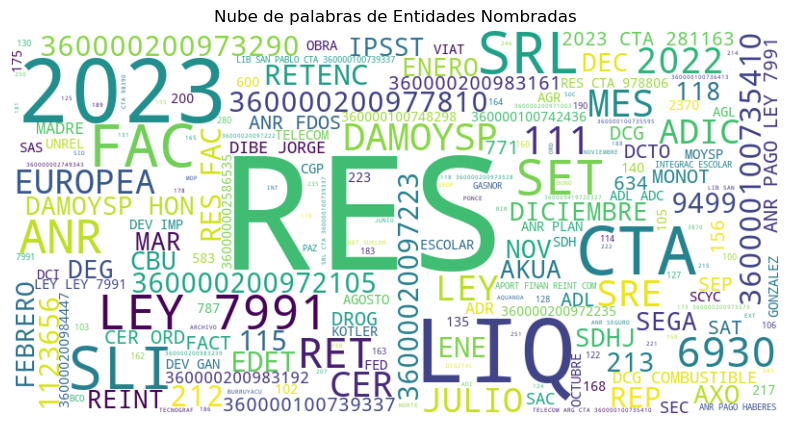

In [26]:
import spacy
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# Asumiendo que tu DataFrame se llama 'df' y tiene una columna 'Descripcion'
# Si no es así, ajusta el nombre del DataFrame y la columna según sea necesario

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Aplicar la función a la columna 'Descripcion'
df['entities'] = df['texto_limpio'].apply(extract_entities)

# Aplanar la lista de entidades
all_entities = [entity for entities in df['entities'] for entity in entities]

# Contar las entidades
entity_counts = Counter(all_entities)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de Entidades Nombradas')
plt.show()


# plt.savefig('ner_wordcloud.png', bbox_inches='tight')

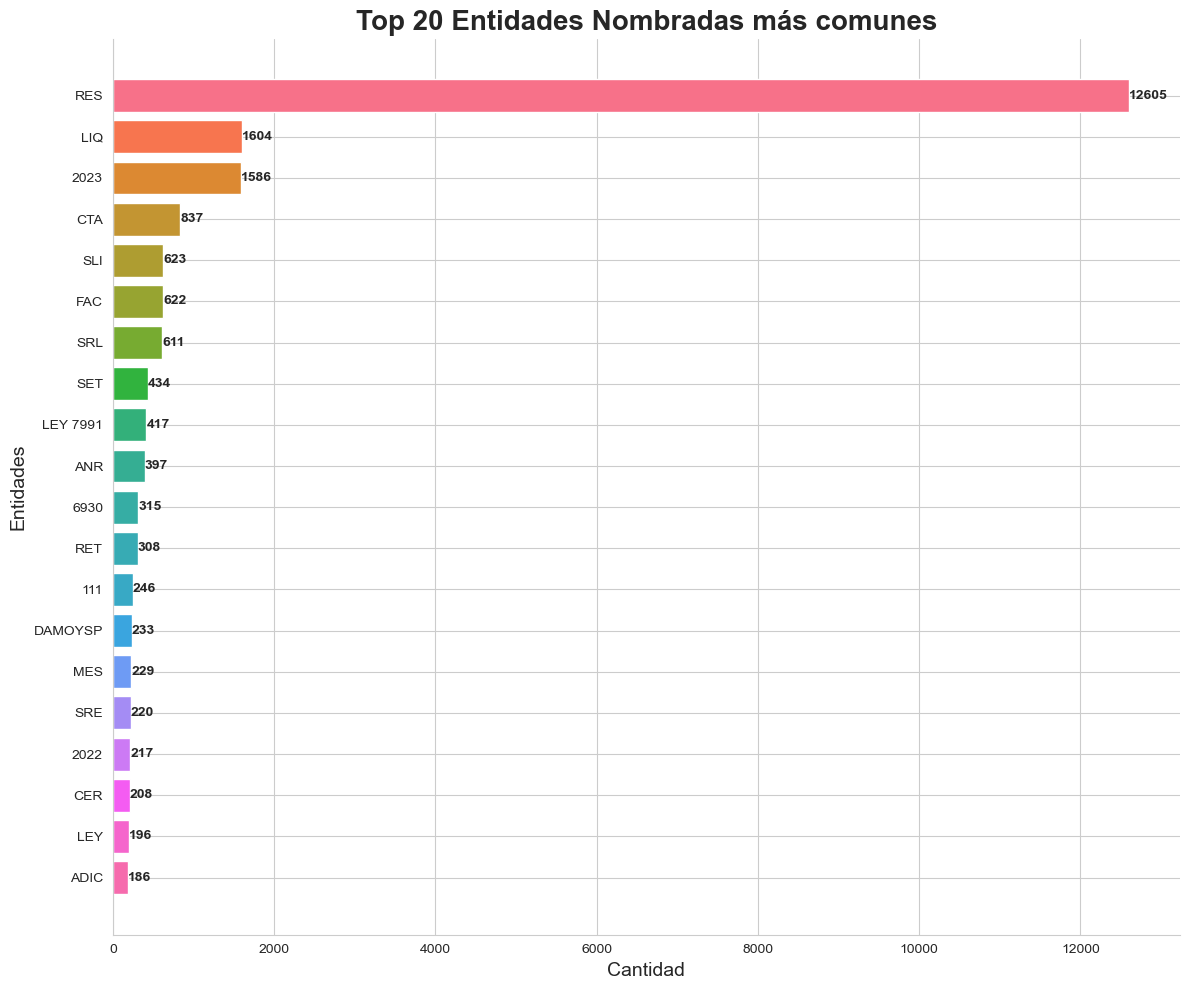

In [27]:
# Obtener las 20 entidades más comunes y ordenarlas de mayor a menor
top_20 = sorted(entity_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar las entidades y los conteos
entities, counts = zip(*top_20)

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(entities)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(entities)), entities)

# Personalizar el gráfico
plt.title('Top 20 Entidades Nombradas más comunes', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Entidades', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que la entidad más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

## Noun Chunks

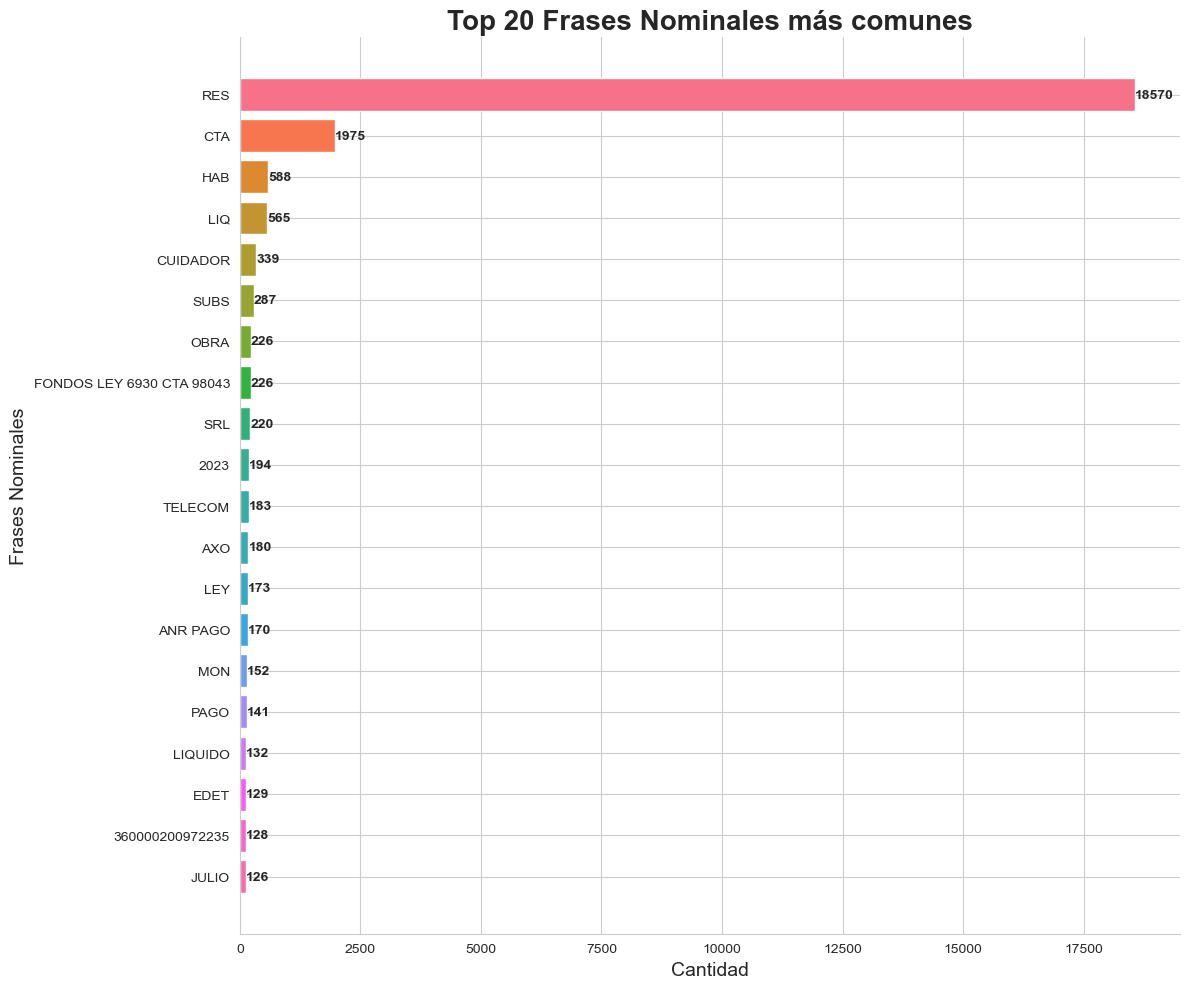

Los 20 noun chunks más comunes:
RES: 18570
CTA: 1975
HAB: 588
LIQ: 565
CUIDADOR: 339
SUBS: 287
OBRA: 226
FONDOS LEY 6930 CTA 98043: 226
SRL: 220
2023: 194
TELECOM: 183
AXO: 180
LEY: 173
ANR PAGO: 170
MON: 152
PAGO: 141
LIQUIDO: 132
EDET: 129
360000200972235: 128
JULIO: 126


In [28]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Asumiendo que tu DataFrame se llama 'df' y tiene una columna 'Descripcion'

def extract_noun_chunks(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

# Aplicar la función a la columna 'Descripcion'
df['noun_chunks'] = df['texto_limpio'].apply(extract_noun_chunks)

# Aplanar la lista de noun chunks
all_chunks = [chunk for chunks in df['noun_chunks'] for chunk in chunks]

# Contar los noun chunks
chunk_counts = Counter(all_chunks)

# Obtener los 20 noun chunks más comunes y ordenarlos de mayor a menor
top_20 = sorted(chunk_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar los chunks y los conteos
chunks, counts = zip(*top_20)

# Configurar el estilo de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(chunks)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(chunks)), chunks)

# Personalizar el gráfico
plt.title('Top 20 Frases Nominales más comunes', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frases Nominales', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que el chunk más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Si quieres guardar la imagen
# plt.savefig('top_20_noun_chunks.png', bbox_inches='tight', dpi=300)

# Imprimir los 20 noun chunks más comunes
print("Los 20 noun chunks más comunes:")
for chunk, count in top_20:
    print(f"{chunk}: {count}")

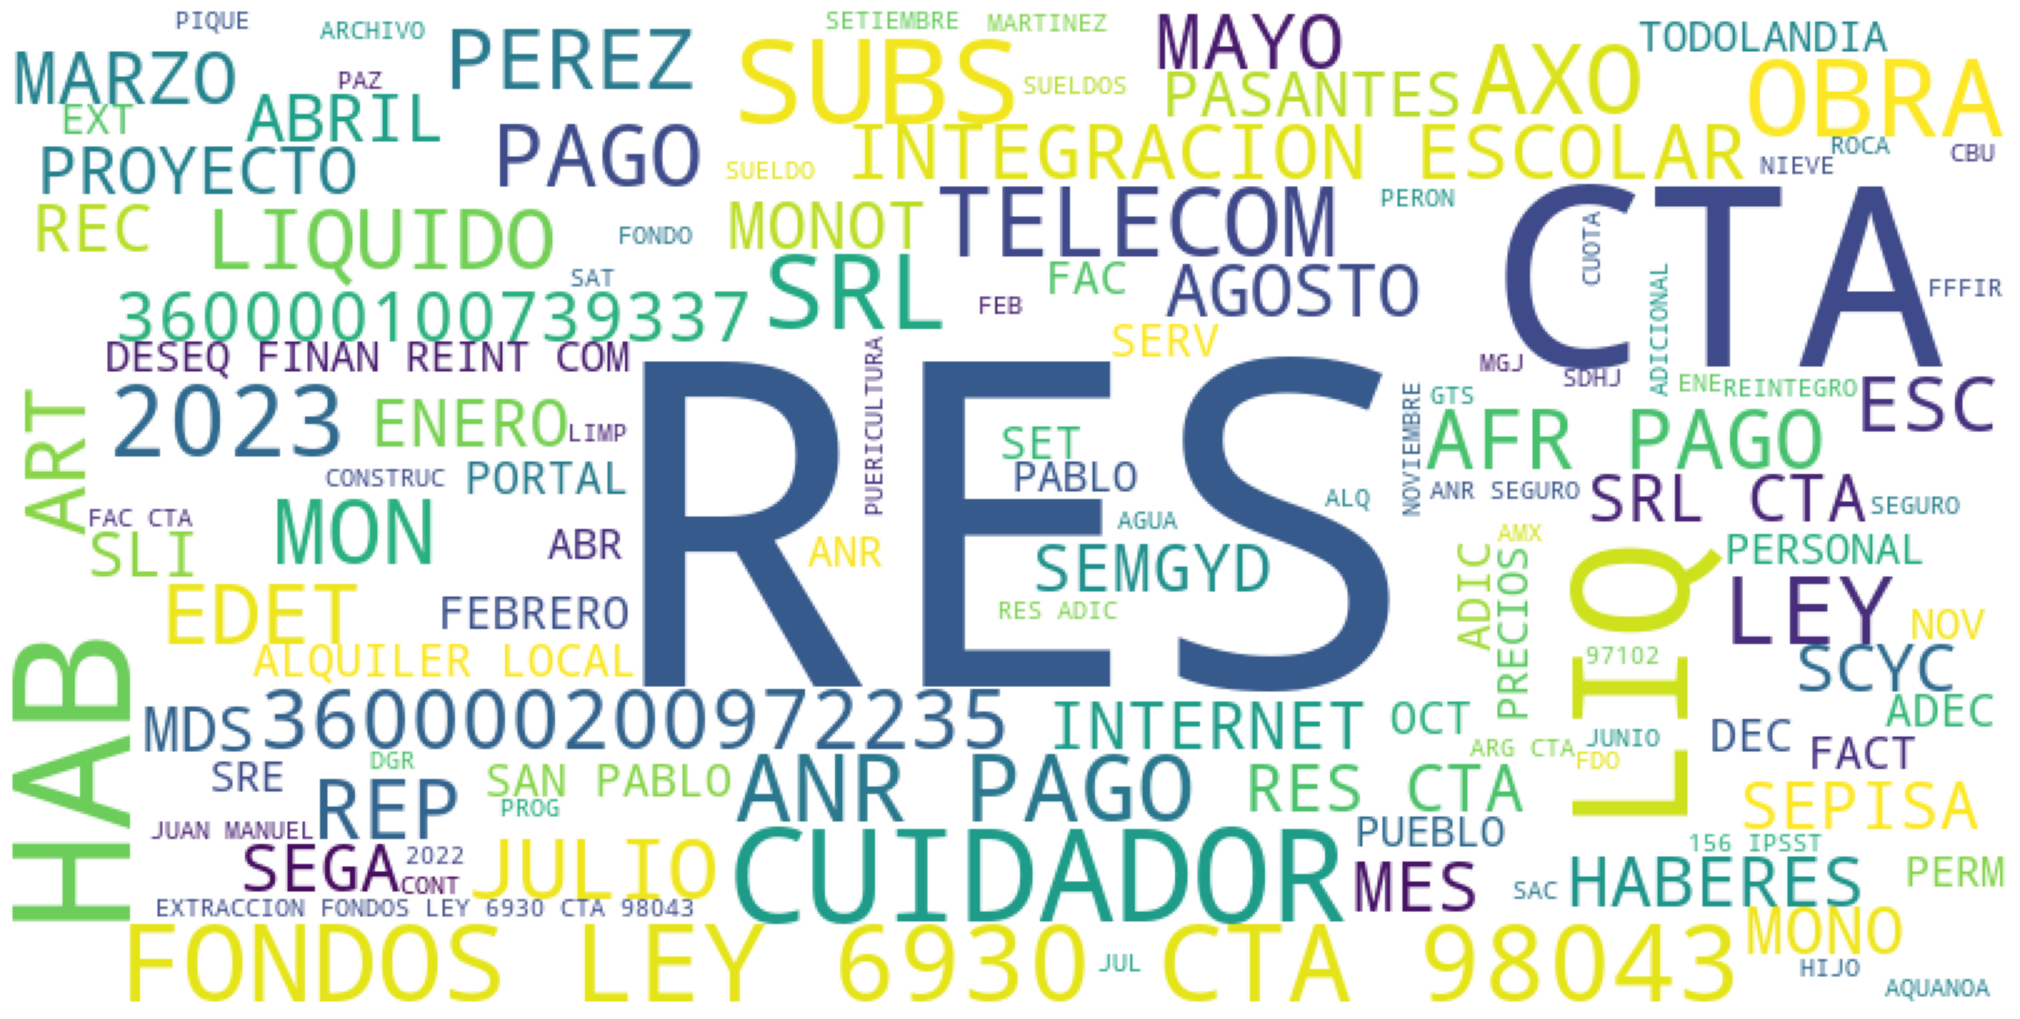

In [29]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      min_font_size=10).generate_from_frequencies(chunk_counts)

# Crear la figura
plt.figure(figsize=(20,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Mostrar la nube de palabras
plt.show()

## KeyBert

In [ ]:
### CUIDADO: tarda 1 hora ###

from keybert import KeyBERT

# Inicializa el modelo KeyBERT
kw_model = KeyBERT()

# Extrae las keywords para cada descripción
df['keywords'] = df['texto_limpio'].apply(lambda x: kw_model.extract_keywords(x, top_n=5))


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todas las keywords en un solo string
all_keywords = ' '.join([' '.join([kw[0] for kw in kws]) for kws in df['keywords']])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_keywords)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter

# Contar la frecuencia de cada keyword
keyword_counts = Counter([kw[0] for kws in df['keywords'] for kw in kws])

# Convertir a DataFrame para graficar
df_keyword_counts = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)

# Graficar
plt.figure(figsize=(10, 5))
df_keyword_counts.head(20).plot(kind='bar', x='Keyword', y='Count', legend=False)
plt.title('Top 20 Keywords')
plt.ylabel('Frequency')
plt.xlabel('Keywords')
plt.show()


In [ ]:
from collections import Counter

# Contar la frecuencia de cada keyword
keyword_counts = Counter([kw[0] for kws in df['keywords'] for kw in kws])

# Obtener los 20 noun chunks más comunes y ordenarlos de mayor a menor
top_20 = sorted(keyword_counts.most_common(20), key=lambda x: x[1], reverse=True)

# Separar los chunks y los conteos
kewywords, counts = zip(*top_20)

# Crear el gráfico de barras horizontales
bars = plt.barh(range(len(kewywords)), counts, align='center', 
                color=sns.color_palette("husl", 20))
plt.yticks(range(len(kewywords)), kewywords)

# Personalizar el gráfico
plt.title('Top 20 Keywords', fontsize=20, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Frases Nominales', fontsize=14)

# Añadir las cantidades al final de cada barra
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Invertir el eje y para que el chunk más común esté arriba
plt.gca().invert_yaxis()

# Remover el borde superior y derecho del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Si quieres guardar la imagen
# plt.savefig('top_20_noun_chunks.png', bbox_inches='tight', dpi=300)